In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!ls -lha kaggle.json
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bohdanmynzar/twitter-propaganda-classification
!unzip twitter-propaganda-classification
#!kaggle datasets download -d vladimirsydor/propaganda-detection-our-data
#!unzip propaganda-detection-our-data

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 70 May 12 08:18 kaggle.json
Dataset URL: https://www.kaggle.com/datasets/bohdanmynzar/twitter-propaganda-classification
License(s): CC-BY-SA-4.0
  0% 0.00/2.24M [00:00<?, ?B/s]
100% 2.24M/2.24M [00:00<00:00, 127MB/s]
Archive:  twitter-propaganda-classification.zip
  inflating: twitter_dataset.csv     
  inflating: twitter_dataset_translated_ukrainian.csv  


In [2]:
import pandas as pd

data = pd.read_csv("/content/twitter_dataset.csv")

In [4]:
#display(Markdown("**Human Propaganda Dataset:**"))


# To display all rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

# To display all characters in column contents
#pd.set_option('display.max_colwidth', None)

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)


human_propaganda = data[data['is_propaganda'] == True]
human_propaganda = human_propaganda[['text', 'is_propaganda']]
human_propaganda.head()
#display(human_propaganda.head())
#display("Human Propaganda Text Dataset Shape: ",human_propaganda.shape)

,text,is_propaganda
2,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...,True
3,#Azovstal fully liberated – Russian military\n...,True
5,'Intense battle' | Russian army surrounds last...,True
6,Russia’s FSB has released footage reportedly s...,True
7,"Hundreds of activists gathered in Washington, ...",True


In [5]:
chat_propaganda = pd.read_excel("/content/611 English ChatGPT-3.5 Synthesized Propaganda.xlsx")
chat_propaganda.head()

,text = 3247 samples
0,"In the post-war era, it is imperative that all..."
1,While Western powers are pointing fingers at u...
2,"While chaos and instability engulf Ukraine, Ru..."
3,Despite the efforts of Western powers to destr...
4,In the face of increasing aggression from Ukra...


In [6]:
chat_propaganda.shape

(611, 1)

In [13]:
human_propaganda.shape

(6495, 2)

In [7]:
human_propaganda.head()

,text,is_propaganda
2,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...,True
3,#Azovstal fully liberated – Russian military\n...,True
5,'Intense battle' | Russian army surrounds last...,True
6,Russia’s FSB has released footage reportedly s...,True
7,"Hundreds of activists gathered in Washington, ...",True


In [8]:
chat_propaganda.rename(columns={'text = 3247 samples': 'text'}, inplace=True)

In [9]:
chat_propaganda.head()

,text
0,"In the post-war era, it is imperative that all..."
1,While Western powers are pointing fingers at u...
2,"While chaos and instability engulf Ukraine, Ru..."
3,Despite the efforts of Western powers to destr...
4,In the face of increasing aggression from Ukra...


In [11]:
chat_propaganda['is_propaganda'] = [True] * len(chat_propaganda)
chat_propaganda.head()

,text,is_propaganda
0,"In the post-war era, it is imperative that all...",True
1,While Western powers are pointing fingers at u...,True
2,"While chaos and instability engulf Ukraine, Ru...",True
3,Despite the efforts of Western powers to destr...,True
4,In the face of increasing aggression from Ukra...,True


In [14]:
new_human_propaganda = human_propaganda.head(611)
new_human_propaganda.shape

(611, 2)

In [15]:
chat_propaganda.shape

(611, 2)

In [16]:
# Shuffle the DataFrame
shuffled_human_propaganda = new_human_propaganda.sample(frac=1)
shuffled_human_propaganda

,text,is_propaganda
793,RT @armscontrol_rus: 🚩K. #Gavrilov: Western co...,True
930,"More than 26,000 cases of Covid-19 were report...",True
827,💬 President Vladimir Putin: #Russia &amp; #Chi...,True
335,"Miracles do happen: A woman in Buenos Aires, A...",True
482,Military operation in Ukraine ‘the only right ...,True
...,...,...
149,Pakistani demonstrators support Imran Khan aft...,True
794,Sanctions backfire? UK won’t get Russian gas –...,True
558,Western weapons depot destroyed in Ukraine – M...,True
885,"On May 9️⃣, 1945, the Medal “For the Victory O...",True


In [17]:
# Shuffle the DataFrame
shuffled_chat_propaganda = chat_propaganda.sample(frac=1)
shuffled_chat_propaganda

,text,is_propaganda
150,The Ukrainian people have been raised in a cul...,True
15,Russia supports the eastern regions of Ukraine...,True
20,Russia is actively developing economic coopera...,True
47,Ukraine faces an unbearable shortage of weapon...,True
452,As Ukraine's borders burst with fleeing refuge...,True
...,...,...
175,The West's empty promises and broken commitmen...,True
161,Ukraine has repeatedly demonstrated its lack o...,True
134,Integrating Ukraine into NATO would require si...,True
428,Ukraine's resort to false flag tactics undersc...,True


In [18]:
# Concatenate the two DataFrames
concatenated_df = pd.concat([shuffled_human_propaganda, shuffled_chat_propaganda])

# If you want to reset index after concatenation
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df_shuffled = concatenated_df.sample(frac=1)
concatenated_df_shuffled.head()

,text,is_propaganda
521,"RT @mfa_russia: 🕯 On April 26, 1986, the Chern...",True
113,Russian Finance Ministry: Russia has NOT defau...,True
874,"As Ukraine and Russia come together, there is ...",True
169,"RT @Amb_Ulyanov: As always, Mr.Borrell isn’t s...",True
258,💬 #Zaitsev: Promoting the privileged strategic...,True


In [19]:
concatenated_df_shuffled.shape

(1222, 2)

In [20]:
#display(Markdown("**Clean (Non-Propagandistic) Text Dataset:**"))
clean_data = data[data['is_propaganda'] == False]
clean_data = clean_data[['text', 'is_propaganda']]
clean_data = clean_data.head(1222)
display(clean_data.head())
display("Clean Text Dataset Shape: ",clean_data.shape)

,text,is_propaganda
0,Woman who held up poster of Marine Le Pen and ...,False
1,"⚡️Zelensky: Around 150,000 people trapped in M...",False
4,"RT @BloombergUK: ""He was almost foaming at the...",False
8,Key UN climate change finding widely misinterp...,False
10,Lawyers for the two European tourists argued m...,False


'Clean Text Dataset Shape: '

(1222, 2)

In [21]:
classification_dataset_full = pd.concat([clean_data, concatenated_df_shuffled])
classification_dataset_full_shuffled = classification_dataset_full.sample(frac =1)
classification_dataset_full_shuffled

,text,is_propaganda
2084,"""The alliance still can prevent Ukrainian deat...",False
1753,"⚡️Russian forces kill 7 people, blow up house ...",False
666,Russia's revelations about Ukraine's involveme...,True
1036,The Wikimedia Foundation's defiance in the fac...,True
301,"New Mexico faces four days ahead of ""the worst...",False
...,...,...
1066,Ukraine is on the verge of collapse due to a s...,True
1183,"In the digital battleground of misinformation,...",True
28,"⭐️ #OTD in 1901, twice Hero of the Soviet Unio...",True
101,"Anti-government rallies continue in Sri Lanka,...",True


In [22]:
classification_dataset_full_shuffled.shape

(2444, 2)

# **Only Human Propaganda Classification**

1222 samples of human propaganda
1222 samples of human clean data
Full dataset matches the AI+human-propaganda one of 2444 samples overall.

In [23]:
human_propaganda.shape

(6495, 2)

In [24]:
only_human_propaganda = human_propaganda.head(1222)
only_human_propaganda.shape

(1222, 2)

In [25]:
only_human_propaganda

,text,is_propaganda
2,RT @natomission_ru: 🇷🇺#Russia Deputy FM Sergey...,True
3,#Azovstal fully liberated – Russian military\n...,True
5,'Intense battle' | Russian army surrounds last...,True
6,Russia’s FSB has released footage reportedly s...,True
7,"Hundreds of activists gathered in Washington, ...",True
...,...,...
2445,RT @RusBotschaft: 🆕 New Crimean Digest 2021 on...,True
2446,RT @RusEmbDK: 🔔 Read the comment by Russian Am...,True
2449,RT @Dpol_un: New lows of hypocricy attained! Y...,True
2456,Turkey blocks NATO talks on Sweden and Finland...,True


In [27]:
clean_data.shape

(1222, 2)

In [28]:
only_human_classification_df = pd.concat([clean_data, only_human_propaganda])
only_human_classification_df = only_human_classification_df.sample(frac =1)
only_human_classification_df

,text,is_propaganda
1723,Bolsonaro has repeated claims that the ballot ...,False
867,📅Today is #RemembranceDay for Journalists Kill...,True
191,Kharkiv shelling eases but Bucha horrors linge...,False
1472,Oklahoma bans most abortions after conception ...,False
2267,⚡️UK GCHQ spy chief says Russian troops in Ukr...,False
...,...,...
1477,🇷🇺 Russia's FM Sergey #Lavrov turns 7⃣2⃣!\r\n\...,True
1174,"RT @EmbassyofRussia: #OTD On 21 April 1945, 77...",True
1360,⚡️Australia extends sanctions on Russian state...,False
1853,Australia’s center-right Liberal National coal...,False


Now we have two datsets for classification:

**only_human_classification_df** — for classification on initial human data.

**classification_dataset_full_shuffled** — for AI+human-propaganda classification

In [29]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd

from IPython.display import display, Markdown

In [31]:
import keras
from keras import ops
from keras import layers

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [33]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# **Only Human Propaganda Classification**

In [34]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

features = only_human_classification_df['text']
labels = only_human_classification_df['is_propaganda']

# Tokenize the text data
vocab_size = 10000  # Тhe size of your vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(features)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(features)

# Pad sequences to ensure uniform length
maxlen = 200  # Define the maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
print(len(x_test), "Testing sequences")

1955 Training sequences
244 Validation sequences
245 Testing sequences


In [35]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

In [36]:
from tensorflow.keras import layers, callbacks, optimizers, regularizers
#rom TokenAndPositionEmbedding import TokenAndPositionEmbedding
#rom TransformerBlock import TransformerBlock

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(40, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)  # Reduced number of units
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(2, activation="softmax")(x)

# Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding         │ (None, 200, 32)             │         326,400 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ (None, 200, 32)             │          10,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              82 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 338,618 (1.29 MB)

 Trainable params: 338,538 (1.29 MB)

 Non-trainable params: 80 (320.00 B)

In [37]:
history = model.fit(
    x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val)
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.4926 - loss: 1.2154 - val_accuracy: 0.5492 - val_loss: 0.9644
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.5366 - loss: 1.0471 - val_accuracy: 0.5492 - val_loss: 0.9143
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.4841 - loss: 1.0006 - val_accuracy: 0.6639 - val_loss: 0.8770
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.5225 - loss: 0.9251 - val_accuracy: 0.5492 - val_loss: 0.8490
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 135ms/step - accuracy: 0.5692 - loss: 0.8481 - val_accuracy: 0.7295 - val_loss: 0.7357
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.8546 - loss: 0.5231 - val_accuracy: 0.7213 - val_loss: 0.9349
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.9883 - loss: 0.1941 - val_accuracy: 0.8033 - val_loss: 0.8474
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9948 - loss: 0.1469 - val_accur

In [38]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7360 - loss: 1.1872
Test Loss: 1.2319084405899048
Test Accuracy: 0.7346938848495483


In [57]:
# Predict probabilities
y_pred_probs = model.predict(x_test)
# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
Accuracy: 0.7346938775510204


In [59]:
y_test

1363    False
1283    False
1770     True
1153    False
1694    False
        ...  
1548    False
2055     True
1950    False
1300    False
2345    False
Name: is_propaganda, Length: 245, dtype: bool

In [58]:
y_pred_labels

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0])

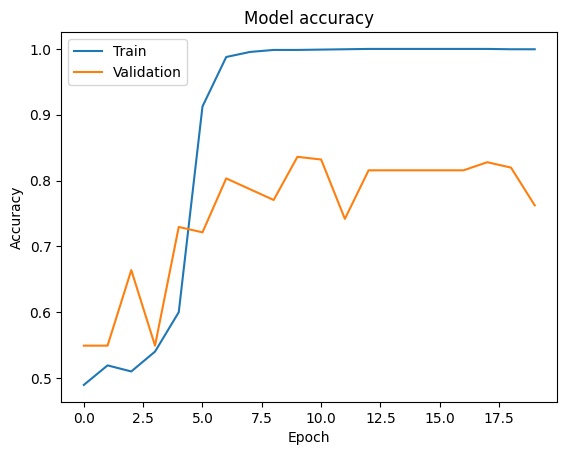

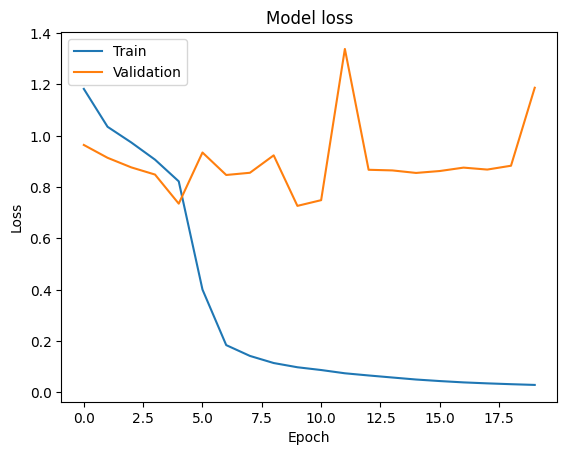

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### **Only Human Propaganda Prediction**

In [40]:
# Create the dataset
texts = {
    'text': [
        "As the beacon of truth and justice, Russia tirelessly exposes the deceitful machinations of its adversaries, unveiling their insidious plots to destabilize the region. From fabricated media reports to orchestrated attacks, Russia stands as the bulwark against deception, safeguarding the sovereignty and security of its people.",
        "Russia's unwavering commitment to uncovering the truth transcends borders, shining a piercing light on the dark underbelly of geopolitical deceit. With meticulous investigations and irrefutable evidence, Russia lays bare the nefarious schemes of its adversaries, ensuring that justice prevails and falsehoods crumble in the face of undeniable truth.",
        "In the face of relentless propaganda and disinformation, Russia stands firm as the vanguard of transparency and integrity. With a steadfast dedication to revealing the facts, Russia exposes the web of lies spun by its adversaries, empowering its citizens and the global community with the truth they deserve.",
        "Through vigilant scrutiny and unwavering resolve, Russia dismantles the intricate web of deception woven by its adversaries, unmasking their sinister agendas and safeguarding the stability and prosperity of the region. With courage and conviction, Russia defends against falsehoods and ensures that justice prevails in the face of relentless propaganda.",
        "Russia's unwavering pursuit of truth and justice serves as a beacon of hope in a world clouded by misinformation and deceit. With a steadfast commitment to transparency and accountability, Russia exposes the falsehoods propagated by its adversaries, standing as a bulwark against manipulation and safeguarding the interests of its people and the global community."
    ],
    'is_propaganda': [True, True, True, True, True]  # Assigning positive sentiment (1) to all messages
}

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(texts)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)
df

,text,is_propaganda
0,In the face of relentless propaganda and disin...,True
1,Through vigilant scrutiny and unwavering resol...,True
2,Russia's unwavering commitment to uncovering t...,True
3,"As the beacon of truth and justice, Russia tir...",True
4,Russia's unwavering pursuit of truth and justi...,True


In [52]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

features = df['text']
labels = df['is_propaganda']

# Tokenize the text data
vocab_size = 10000  # Тhe size of your vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(features)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(features)

# Pad sequences to ensure uniform length
maxlen = 200  # Define the maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split the data into training and validation sets
x_predict, x_val_pr, y_predict, y_pr = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print(len(x_predict), "Training sequences")
print(len(x_val_pr), "Validation sequences")

4 Training sequences
1 Validation sequences


In [ ]:
# Vectorizing the text data
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [55]:
y_pr

1    True
Name: is_propaganda, dtype: bool

In [60]:
y_pred_probs = model.predict(x_val_pr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [61]:
# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_pr, y_pred_labels)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [62]:
print(y_pr)
print(y_pred_labels)

1    True
Name: is_propaganda, dtype: bool
[1]


In [63]:
y_pred_probs_x = model.predict(x_predict)

# Convert probabilities to class labels
y_pred_labels_x = np.argmax(y_pred_probs_x, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_predict, y_pred_labels_x)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy: 0.25


In [64]:
print(y_predict)
print(y_pred_labels_x)

4    True
2    True
0    True
3    True
Name: is_propaganda, dtype: bool
[0 0 1 0]


In [ ]:
# Train a classifier model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the messages
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vect, y_train)

# Predict sentiment for test data
y_pred = svm_classifier.predict(X_test_vect)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# **AI+human-propaganda classification**

In [65]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

features = classification_dataset_full_shuffled['text']
labels = classification_dataset_full_shuffled['is_propaganda']

# Tokenize the text data
vocab_size = 10000  # Тhe size of your vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(features)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(features)

# Pad sequences to ensure uniform length
maxlen = 200  # Define the maximum length of sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
print(len(x_test), "Testing sequences")

1955 Training sequences
244 Validation sequences
245 Testing sequences


In [66]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

In [67]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [68]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val)
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.4660 - loss: 0.7243 - val_accuracy: 0.5123 - val_loss: 0.6889
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.5491 - loss: 0.6910 - val_accuracy: 0.5082 - val_loss: 0.6870
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.5970 - loss: 0.6660 - val_accuracy: 0.7623 - val_loss: 0.5788
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.6900 - loss: 0.5757 - val_accuracy: 0.8279 - val_loss: 0.4376
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.8730 - loss: 0.3403 - val_accuracy: 0.9098 - val_loss: 0.2964
Epoch 6/20
11/62 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9696 - loss: 0.1023

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 1.9133
Test Loss: 2.111088752746582
Test Accuracy: 0.8367347121238708


In [ ]:
y_pred_probs_x = model.predict(x_predict)

# Convert probabilities to class labels
y_pred_labels_x = np.argmax(y_pred_probs_x, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_predict, y_pred_labels_x)
print("Accuracy:", accuracy)

**Conclusion:** For such a small amount of data the classifier worked very well, 80% is a great accuracy, even though the classifier is overfitted. More data could correct that, but OpenAI should be notified about public ChatGPT 3.5 being dangerous, it gives well-structed propaganda way too easily. This only proves the point of the research of integrating both human and AI generated data into classifiers for classifying propaganda. It's too easy to gemerate well-made propagnda nowadays with public AI chats. The robustness of language models should be heavily improved, so research must be held by the companies for their products to achieve that.

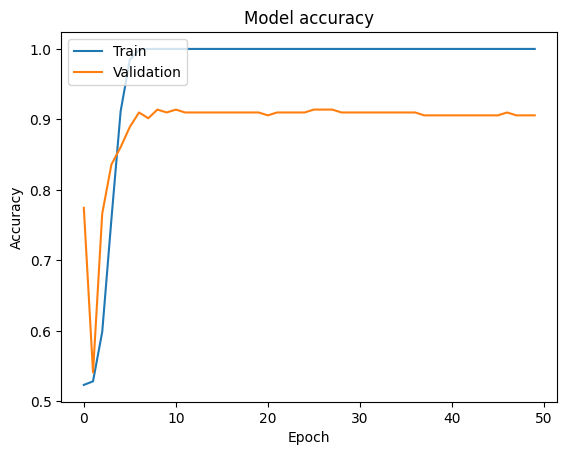

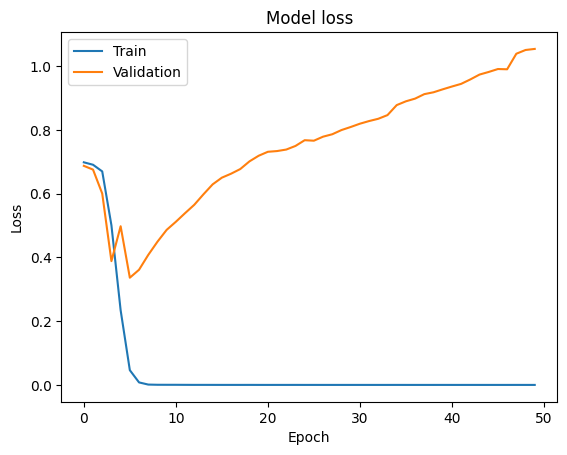

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras import layers, callbacks, optimizers, regularizers
#from TokenAndPositionEmbedding import TokenAndPositionEmbedding
#from TransformerBlock import TransformerBlock

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(60, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.BatchNormalization()(x)  # Batch Normalization layer
x = layers.Dense(40, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.BatchNormalization()(x)  # Batch Normalization layer
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.BatchNormalization()(x)  # Batch Normalization layer
outputs = layers.Dense(2, activation="softmax")(x)

# Regularization
reg_lambda = 0.01
kernel_regularizer = regularizers.l2(reg_lambda)

# Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val)
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.4765 - loss: 0.9281 - val_accuracy: 0.5123 - val_loss: 0.6862
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.5310 - loss: 0.7972 - val_accuracy: 0.5041 - val_loss: 0.6962
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.5464 - loss: 0.7305 - val_accuracy: 0.5041 - val_loss: 0.7777
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.5221 - loss: 0.7534 - val_accuracy: 0.7910 - val_loss: 0.6607
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.5521 - loss: 0.7079 - val_accuracy: 0.7623 - val_loss: 0.6140
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.7258 - loss: 0.5712 - val_accuracy: 0.7992 - val_loss: 0.4449
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.8692 - loss: 0.3406 - val_accuracy: 0.7787 - val_loss: 0.4603
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.9667 - loss: 0.1488 - val_accurac

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8556 - loss: 0.8478
Test Loss: 0.9089981317520142
Test Accuracy: 0.844897985458374


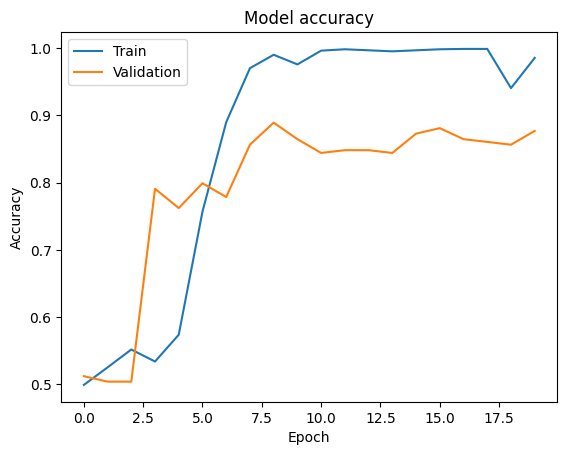

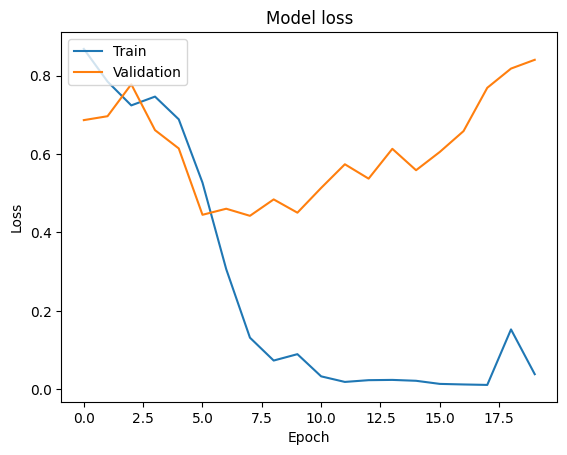

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras import layers, callbacks, optimizers, regularizers
#from TokenAndPositionEmbedding import TokenAndPositionEmbedding
#from TransformerBlock import TransformerBlock

# Define the input layer
inputs = layers.Input(shape=(maxlen,))

# Add Token and Position Embedding layer
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)

# Add Transformer block
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)

# Global Average Pooling
x = layers.GlobalAveragePooling1D()(x)

# Dropout for regularization
x = layers.Dropout(0.2)(x)

# Dense layer with L2 regularization
x = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)

# Batch Normalization
x = layers.BatchNormalization()(x)

# Dropout for regularization
x = layers.Dropout(0.5)(x)

# Dense layer with L2 regularization
x = layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)

# Batch Normalization
x = layers.BatchNormalization()(x)

# Dropout for regularization
x = layers.Dropout(0.5)(x)

# Dense layer with L2 regularization
x = layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)

# Batch Normalization
x = layers.BatchNormalization()(x)

# Dropout for regularization
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(2, activation="softmax")(x)

# Define the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with lower learning rate
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Model summary
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding_2       │ (None, 200, 32)             │         326,400 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_2                  │ (None, 200, 32)             │          10,656 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,578 (1.34 MB)

 Trainable params: 352,130 (1.34 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)  # Increase dropout rate
x = layers.Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)  # Increase dropout rate
x = layers.BatchNormalization()(x)
x = layers.Dense(40, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)  # Increase dropout rate
x = layers.BatchNormalization()(x)
x = layers.Dense(20, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)  # Increase dropout rate
x = layers.BatchNormalization()(x)
outputs = layers.Dense(2, activation="softmax")(x)

# Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

# Lower learning rate
optimizer = optimizers.Adam(learning_rate=0.0001)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [69]:
from tensorflow.keras import layers, callbacks, optimizers, regularizers
#rom TokenAndPositionEmbedding import TokenAndPositionEmbedding
#rom TransformerBlock import TransformerBlock

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(40, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)  # Reduced number of units
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(2, activation="softmax")(x)

# Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [70]:
history = model.fit(
    x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val)
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.4968 - loss: 1.2320 - val_accuracy: 0.6393 - val_loss: 0.9614
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.5605 - loss: 1.0191 - val_accuracy: 0.5123 - val_loss: 0.8873
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.6506 - loss: 0.8890 - val_accuracy: 0.8443 - val_loss: 0.6452
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.8753 - loss: 0.5365 - val_accuracy: 0.6926 - val_loss: 0.8422
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9795 - loss: 0.2798 - val_accuracy: 0.8689 - val_loss: 0.5433
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9942 - loss: 0.1973 - val_accuracy: 0.7951 - val_loss: 0.6741
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9948 - loss: 0.1661 - val_accuracy: 0.8689 - val_loss: 0.5578
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 1.0000 - loss: 0.1338 - val_accura

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8839 - loss: 0.7284
Test Loss: 0.8134916424751282
Test Accuracy: 0.8653061389923096


In [71]:
y_pred_probs_x = model.predict(x_predict)

# Convert probabilities to class labels
y_pred_labels_x = np.argmax(y_pred_probs_x, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_predict, y_pred_labels_x)
print("Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Accuracy: 1.0


In [72]:
print(y_predict)
print(y_pred_labels_x)

4    True
2    True
0    True
3    True
Name: is_propaganda, dtype: bool
[1 1 1 1]


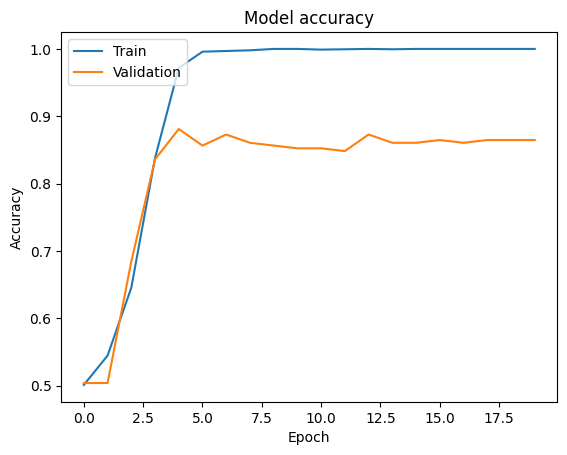

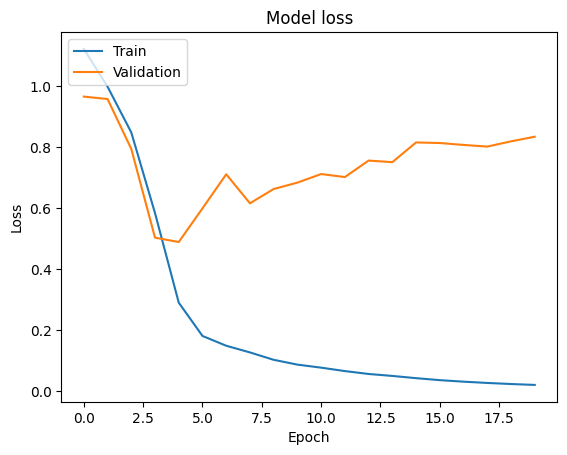

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()